# Historical change 

[Under construction!]


In [1]:
# load packages
import pickle

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import OrderedDict
from gensim.models import KeyedVectors
from whatlies import EmbeddingSet, Embedding
from whatlies.transformers import Normalizer

In [2]:
# load histwords as gensim KeyedVectors
def load_historical_embeddings(year, 
                               path="historical-embeddings/eng-all_sgns/"):
    with open(path + str(year) + "-vocab.pkl", "rb") as f:
        vocab = pickle.load(f)
    
    vectors = np.load(path + str(year) + "-w.npy", mmap_mode="c")
    
    kv = KeyedVectors(vector_size=vectors.shape[1])
    kv.add(entities=vocab, weights=vectors)

    return kv
    

In [3]:
# load histwords as whatlies EmbeddingSet
def load_historical_embeddingset(year, 
                               path="historical-embeddings/eng-all_sgns/"):
    with open(path + str(year) + "-vocab.pkl", "rb") as f:
        vocab = pickle.load(f)
    
    vectors = np.load(path + str(year) + "-w.npy", mmap_mode="c")

    return EmbeddingSet.from_names_X(vocab, vectors)

In [4]:
emb_hist = OrderedDict({year: load_historical_embeddings(year) for year in range(1900, 2000, 10)})

In [5]:
emb_hist[1900].similarity("community", "gay")

-0.038824234

The gensim code is less awkward actually? and identical to whatlies results. 

They both seem to use the dot product.

https://github.com/williamleif/histwords/blob/master/representations/embedding.py#L76

https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/keyedvectors.py#L1143

In [6]:
def get_similarity_over_time(emb_hist, w1, w2):
    df = pd.DataFrame(emb_hist.keys(), columns=["year"])
    
    df["similarity"] = [emb_hist[year].similarity(w1, w2) for year in emb_hist]
    
    df["word1"] = w1
    df["word2"] = w2
    
    return df

In [7]:
df_gay = get_similarity_over_time(emb_hist, "community", "gay")
df_gay

,year,similarity,word1,word2
0,1900,-0.038824,community,gay
1,1910,-0.107995,community,gay
2,1920,-0.126219,community,gay
3,1930,-0.122056,community,gay
4,1940,-0.089771,community,gay
5,1950,-0.120643,community,gay
6,1960,-0.150094,community,gay
7,1970,0.096877,community,gay
8,1980,0.158089,community,gay
9,1990,0.263119,community,gay


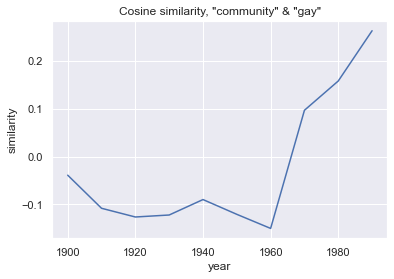

In [9]:
sns.set_theme()
g = sns.lineplot(data=df_gay, x='year', y='similarity')
g.set_title('Cosine similarity, "community" & "gay"')
plt.show()

In [ ]:
emb_fic = OrderedDict()
fic_path = 'historical-embeddings/eng-fiction-all_sgns/'
for year in range(1900, 2000, 10):
    emb_fic[year] = load_historical_embeddings(year, path=fic_path)

In [ ]:
df_gay_fic = get_similarity_over_time(emb_fic, "community", "gay")
df_gay_fic